# Bike-Sharing Rental Trend Analysis

## Introduction

### Business Understanding

> Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

> Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in [Capital Bikeshare](https://capitalbikeshare.com/system-data). We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from [Freemeteo](https://www.freemeteo.com).


### Problem Statements



*   How is the trend of bike users in recent years?
*   How is the trend of casual users and registered users during different months and hours?
*   What is the highest of bike users during different seasons and weathers?
*   Does temperature and humidity affect bike users behaviour?



### Business Objectives



*   Identify the underlying causes of trends or systemic patterns over time.
*   Measuring the strength of the linear relationship between two variables.



## Data Preparation

### Import Libraries

In [51]:
# Data manipulation
import pandas as pd
import numpy as np
import calendar

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Dashboard streamlite
!pip install streamlit
import streamlit as st

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [14]:
df = pd.read_csv('C:/Users/solmaz/Downloads/hour.csv')
print('This dataset has %d rows dan %d columns.\n' % df.shape)
df.head()

This dataset has 17379 rows dan 17 columns.



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Feature Descriptions

| Features | Description |
| :--- | :--- |
| instant | Record index |
| dteday | Date |
| season | Season (1: Springer, 2: Summer, 3: Fall, 4: Winter) |
| yr | Year (0: 2011, 1: 2012) |
| mtnh | Month (1 to 12) |
| hr | Hour (0 to 23) |
| holiday | Weather day is holiday or not (0: Not, 1: Yes) |
| weekday | Day of the week |
| workingday | If day is neither weekend nor holiday is 1, otherwise is 0 |
| weathersit | 1: Clear, Few clouds, Partly cloudy, Partly cloudy |
|            | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist|
|            | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds |
|            | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp | Normalized temperature in Celsius. The values are divided to 41 (max) |
| atemp | Normalized feeling temperature in Celsius. The values are divided to 50 (max) |
| hum | Normalized humidity. The values are divided to 100 (max) |
| windspeed | Normalized wind speed. The values are divided to 67 (max) |
| casual | Count of casual users |
| registered | Count of registered users |
| cnt | Count of total rental bikes including both casual and registered |

## Data Wrangling

### Data Types Information

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* Data type of `dteday` is object, will be convert to datetime format
* `dteday`, `yr`, `mnth`, `hr`, `weathersit`, `hum`, `cnt`, these column will be rename to be easier to understanding the data
* `season`, `weekday`, `mnth`, `weathersit`, is integer data, will be convert to object/categorical values
* `yr` values would be change from 0 to 2011 and 1 to 2012
* `temp` and `humidity` values will be normalized later

### Check Missing Values

In [16]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There is no missing values from the data

### Check Duplicates Data

In [17]:
df.duplicated().sum()

0

There is no duplicate values from the data

### Statistical Summary

In [18]:
# Numerical features
num_features = df.select_dtypes(include=['int64', 'float64'])
print('The number of numerical features is {}'.format(num_features.shape[1]))
num_features.describe().transpose()

The number of numerical features is 16


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [19]:
# Categorical features
cat_features = df.select_dtypes(include=['object'])
print('The number of categorical features is {}'.format(cat_features.shape[1]))
cat_features.describe().transpose()

The number of categorical features is 1


,count,unique,top,freq
dteday,17379,731,2011-01-01,24


In [20]:
# Unique values
unique_val = df.apply(lambda x: len(x.unique()))
unique_val

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

## Data Processing

In [21]:
# Rename columns
df = df.rename(columns={'dteday':'date',
                       'yr':'year',
                       'mnth':'month',
                       'hr':'hour',
                       'weathersit':'weather',
                       'hum':'humidity',
                       'cnt':'count'})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  int64  
 3   year        17379 non-null  int64  
 4   month       17379 non-null  int64  
 5   hour        17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weather     17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  humidity    17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  count       17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [23]:
# Change label in column season, weather, and month
def replace_season(x):
  if x == 1:
    return 'Springer'
  elif x == 2:
    return 'Summer'
  elif x == 3:
    return 'Fall'
  else:
    return 'Winter'

def replace_weather(x):
  if x == 1:
    return 'Clear'
  elif x == 2:
    return 'Mist'
  elif x == 3:
    return 'Light Snow'
  else:
    return 'Heavy Rain'

df['season'] = df['season'].apply(replace_season)

df['weather'] = df['weather'].apply(replace_weather)

# convert month to calendar month name
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

# convert date to datetime format
df['date'] = pd.to_datetime(df['date'])

# convert weekday to day name
df['weekday'] = df['date'].dt.day_name()

# convert year values to 2011 and 2012
df['year'] = df['date'].dt.year

# normalize values for temp and humidity
df['temp'] = df['temp']*41
df['humidity'] = df['humidity']*100

In [24]:
df.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,Clear,9.84,0.2879,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,Clear,9.02,0.2727,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,Clear,9.02,0.2727,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,Clear,9.84,0.2879,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,Clear,9.84,0.2879,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Univariate Analysis

In [25]:
# Grouping selected numerical data
nums = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

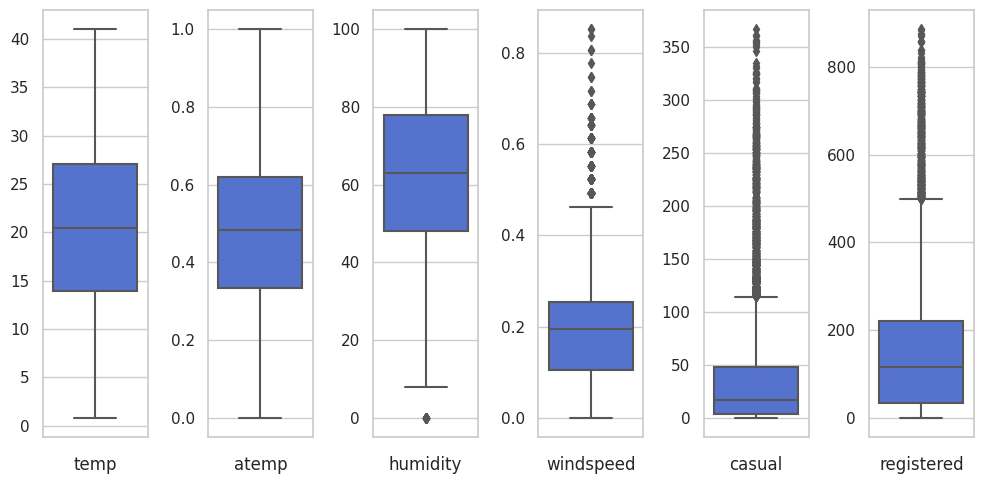

In [26]:
# Boxplot
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10,5))
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='royalblue', orient='v')
    plt.xlabel(features[i])
    plt.ylabel("")
    plt.tight_layout()

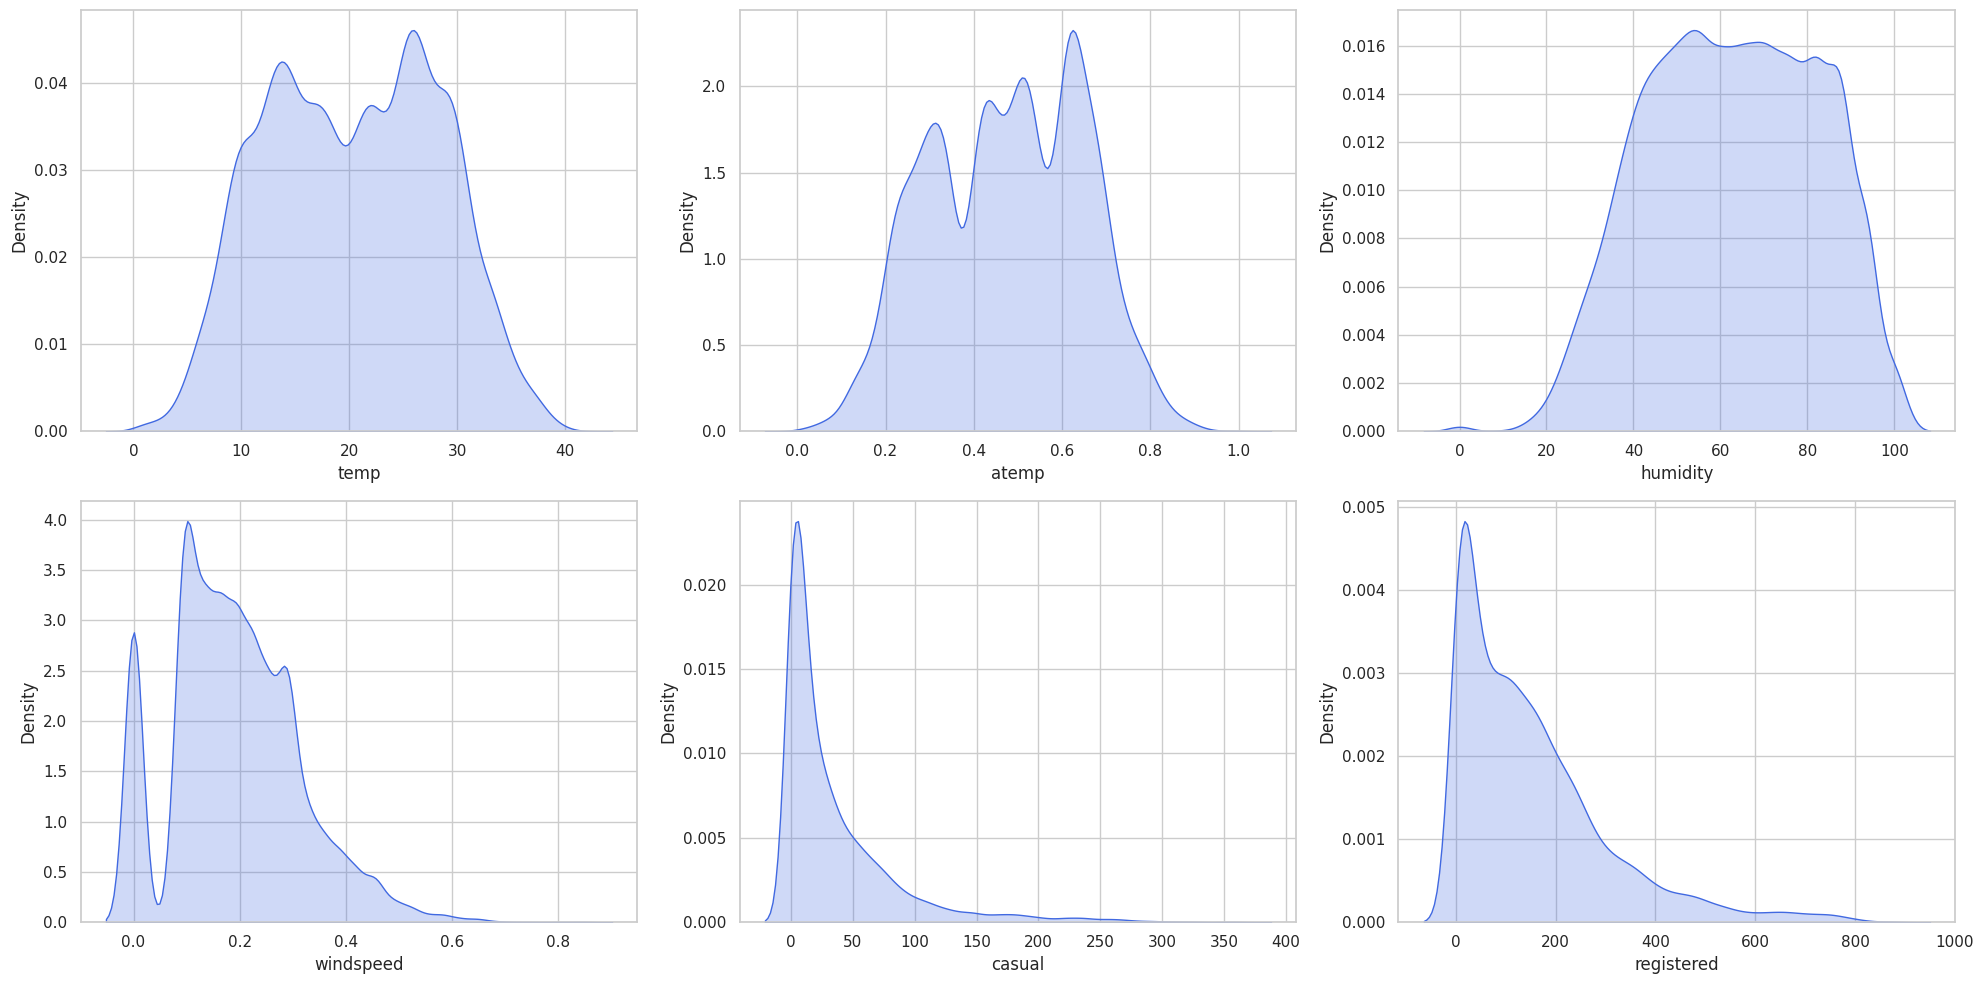

In [27]:
# KDE plot
sns.set_theme(style='whitegrid')
features = nums
plt.figure(figsize=(20,10))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(x=df[features[i]], color='royalblue', shade=True)
    plt.xlabel(features[i])
    plt.tight_layout()

* Outliers are visible in the `windspeed`, `casual`, and `registered` columns
* `temp`, `atemp`, `humidity` looks symmetrical data distribution (normal distribution), while `casual` and `registered` has a strong right-skewed data
* On the other hand, `windspeed` showing bimodal distribution data

### Total Bike Users by Season

In [28]:
# table
season_group = df.groupby('season').agg({'count':'sum'}).reset_index()
season_group.columns = ['season','total']
season_group['%'] = round(season_group['total']*100/sum(season_group['total']),2)
season_group.sort_values(by='total', ascending=False)

,season,total,%
0,Fall,1061129,32.23
2,Summer,918589,27.90
3,Winter,841613,25.56
1,Springer,471348,14.32


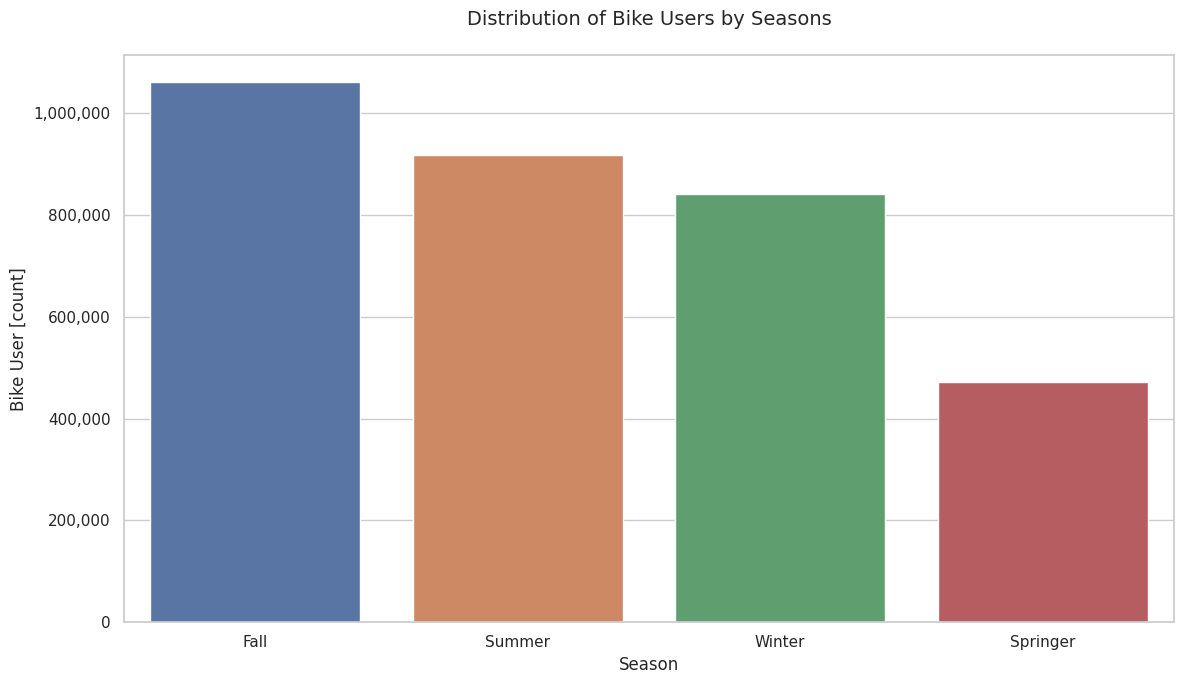

In [29]:
# visualize
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
sns.barplot(x='season', y='total', data=season_group.sort_values(by='total', ascending=False))
plt.title('Distribution of Bike Users by Seasons\n', fontsize=14)
plt.xlabel('Season')
plt.ylabel('Bike User [count]')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.tight_layout()
plt.show();

* Most of the users bike during the fall (32.23%) and summer (27.90%) seasons; the difference is 142,540 more bike users in the fall season.
* Overall, there is no significant difference in total bike users between each season.

### Total Bike Users by Weather

In [30]:
# table
weather_group = df.groupby('weather').agg({'count':'sum'}).reset_index()
weather_group.columns = ['weather','total']
weather_group['%'] = round(weather_group['total']*100/sum(weather_group['total']),2)
weather_group.sort_values(by='total', ascending=False)

,weather,total,%
0,Clear,2338173,71.01
3,Mist,795952,24.17
2,Light Snow,158331,4.81
1,Heavy Rain,223,0.01


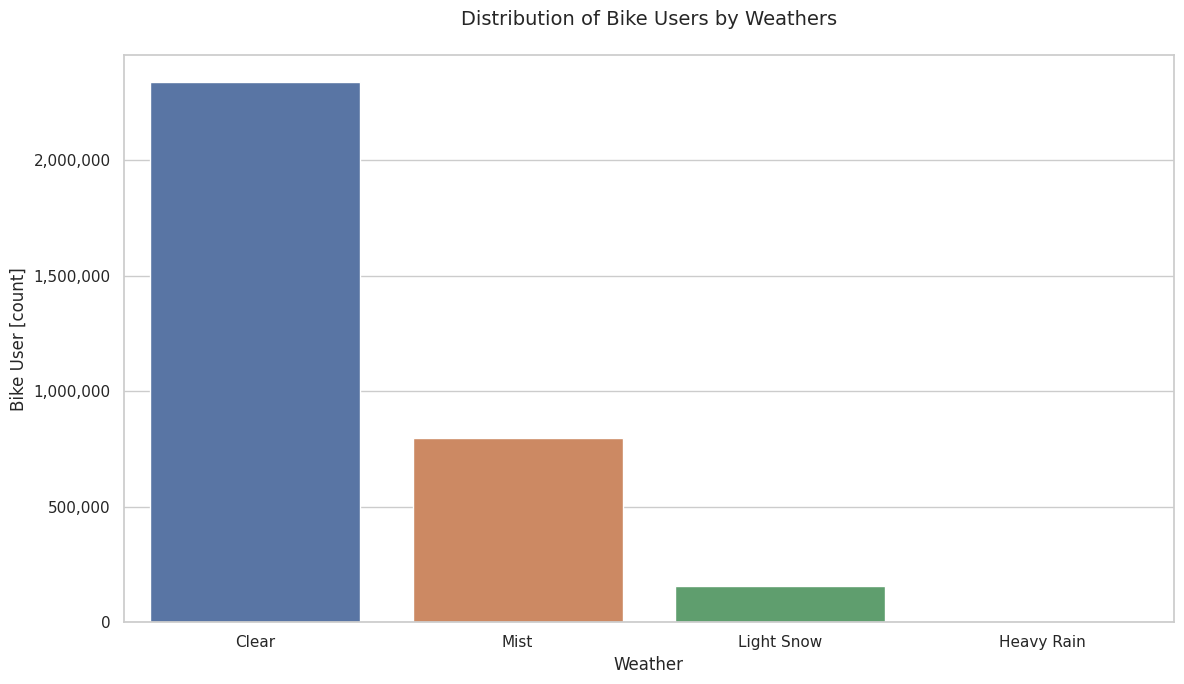

In [31]:
# visualize
sns.set_style('whitegrid')
fig = plt.figure(figsize = (12,7))
sns.barplot(x='weather', y='total', data=weather_group.sort_values(by='total', ascending=False))
plt.title('Distribution of Bike Users by Weathers\n', fontsize=14)
plt.xlabel('Weather')
plt.ylabel('Bike User [count]')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(y) for y in current_values])
plt.tight_layout()
plt.show();

* The majority of users, 2,338,173 (71.01%), were cycling during clear weather.
* There were 223 users (0.01%) cycling during heavy rainy weather.

### Total Bike Users: Casual vs Registered

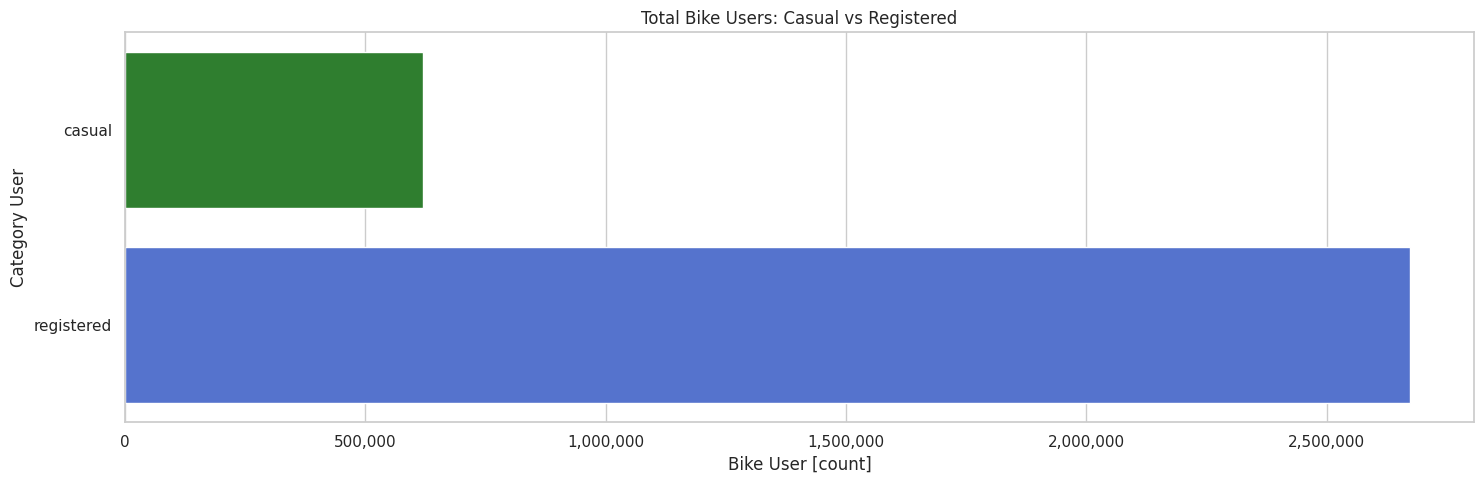

Total of Casual Users: 620,017
Total of Registered users: 2,672,662


In [32]:
total_casual = df['casual'].sum()
total_registered = df['registered'].sum()
plt.figure(figsize=(15, 5))
sns.barplot(x=[total_casual, total_registered], y=['casual', 'registered'],  palette=['forestgreen', 'royalblue'])
plt.xlabel('Bike User [count]')
plt.ylabel('Category User')
plt.title('Total Bike Users: Casual vs Registered')
current_values = plt.gca().get_xticks()
plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.tight_layout()
plt.show()

print(f'Total of Casual Users: {total_casual:,}')
print(f'Total of Registered users: {total_registered:,}')

Based on the graph above, there were 81% registered users, but only 19% were casual bikers.

### Monthly Trend Bike Users

In [33]:
# table
monthly_users = df.resample(rule='M', on='date').agg({'count': 'sum'})
monthly_users.index = monthly_users.index.strftime('%b-%y')
monthly_users = monthly_users.reset_index()
monthly_users.columns = ['date','total']
monthly_users['%'] = round(monthly_users['total']*100/sum(monthly_users['total']),2)
monthly_users.sort_values(by='total', ascending=False)

,date,total,%
20,Sep-12,218573,6.64
19,Aug-12,214503,6.51
18,Jul-12,203607,6.18
17,Jun-12,202830,6.16
21,Oct-12,198841,6.04
16,May-12,195865,5.95
15,Apr-12,174224,5.29
14,Mar-12,164875,5.01
22,Nov-12,152664,4.64
5,Jun-11,143512,4.36


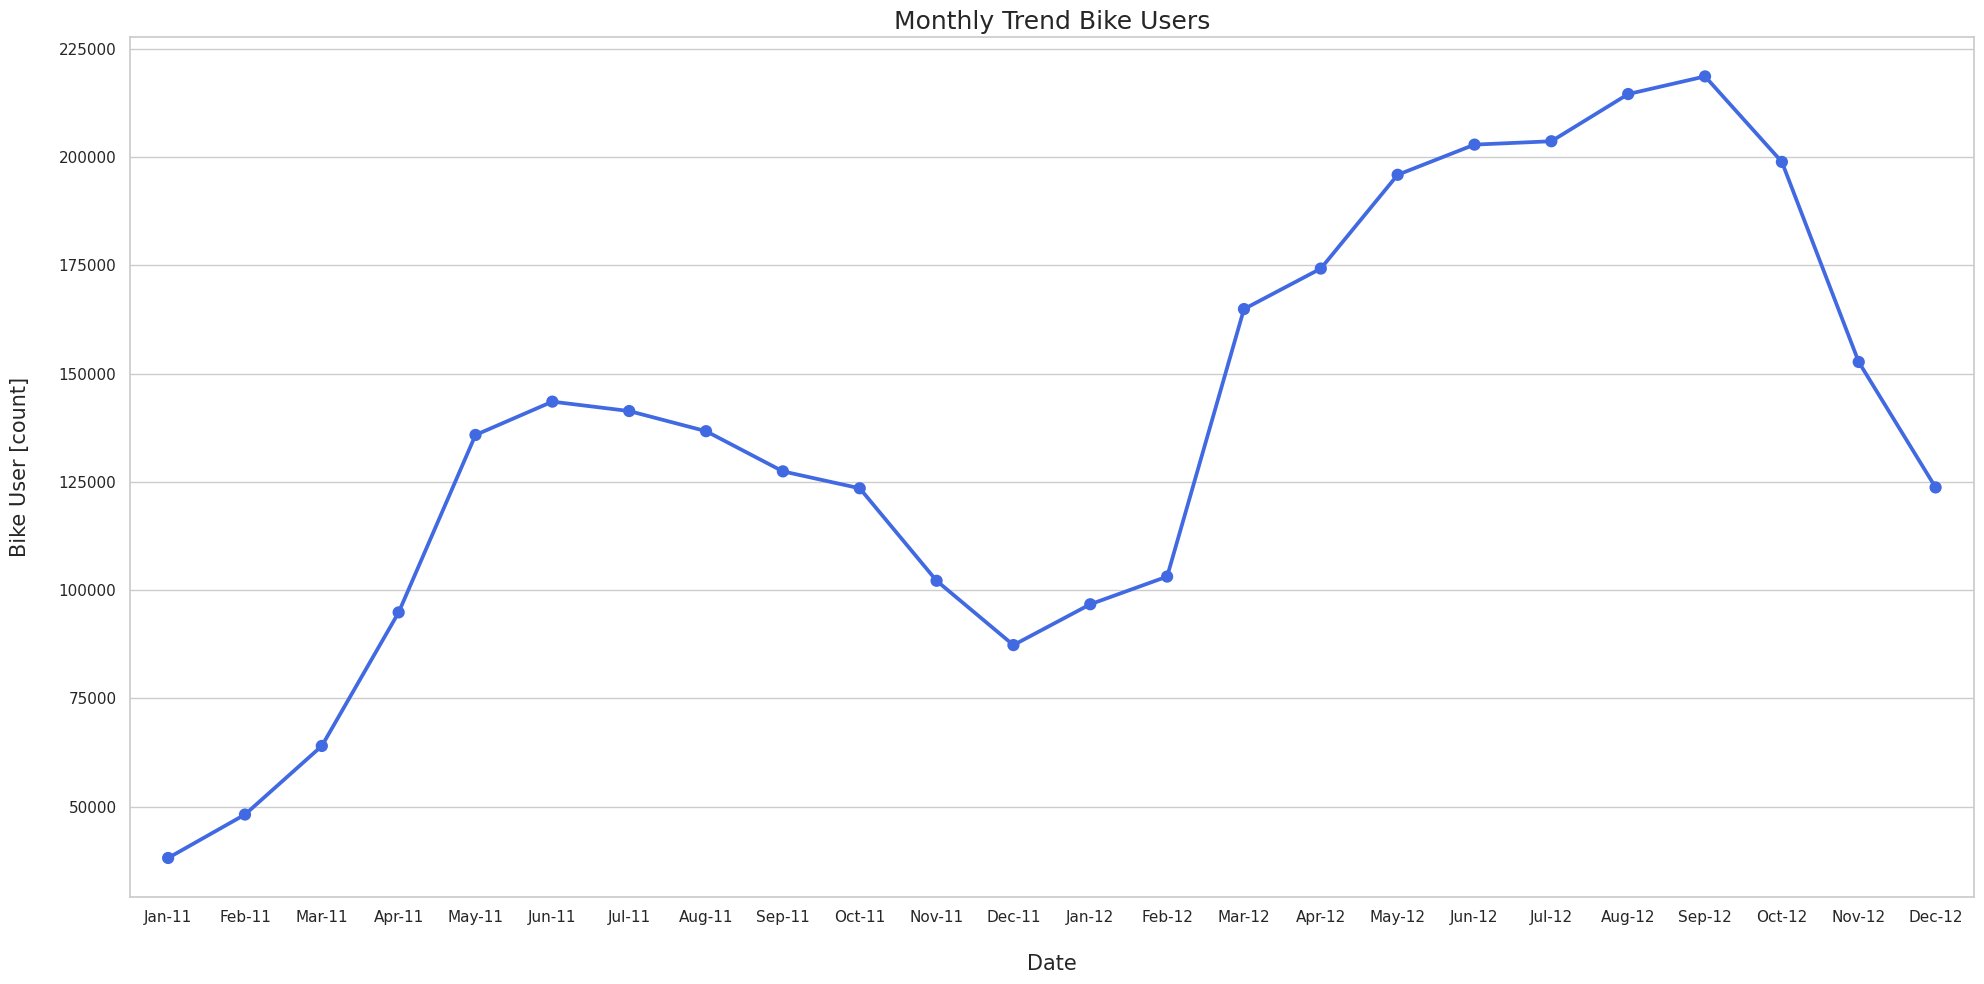

In [34]:
# visualize
plt.figure(figsize=(20,10))
sns.pointplot(x='date', y='total', data=monthly_users, color='royalblue')
plt.xlabel('\nDate', fontsize=15)
plt.ylabel('Bike User [count]\n', fontsize=15)
plt.title('Monthly Trend Bike Users', fontsize=18)
plt.tight_layout()
plt.show();

* September 2012 and August 2012 are the highest total of bike users, meaning it's in the transition season between summer to fall and season.
* In 2011, June was the highest total of bike users with 143,512 bikes during the first summer season.

### Hourly Trend Bike Users

In [35]:
# table
hourly_users = df.groupby('hour').agg({'count': 'sum'})
hourly_users = hourly_users.reset_index()
hourly_users.sort_values(by='count', ascending=False)

,hour,count
17,17,336860
18,18,309772
8,8,261001
16,16,227748
19,19,226789
13,13,184919
12,12,184414
15,15,183149
14,14,175652
20,20,164550


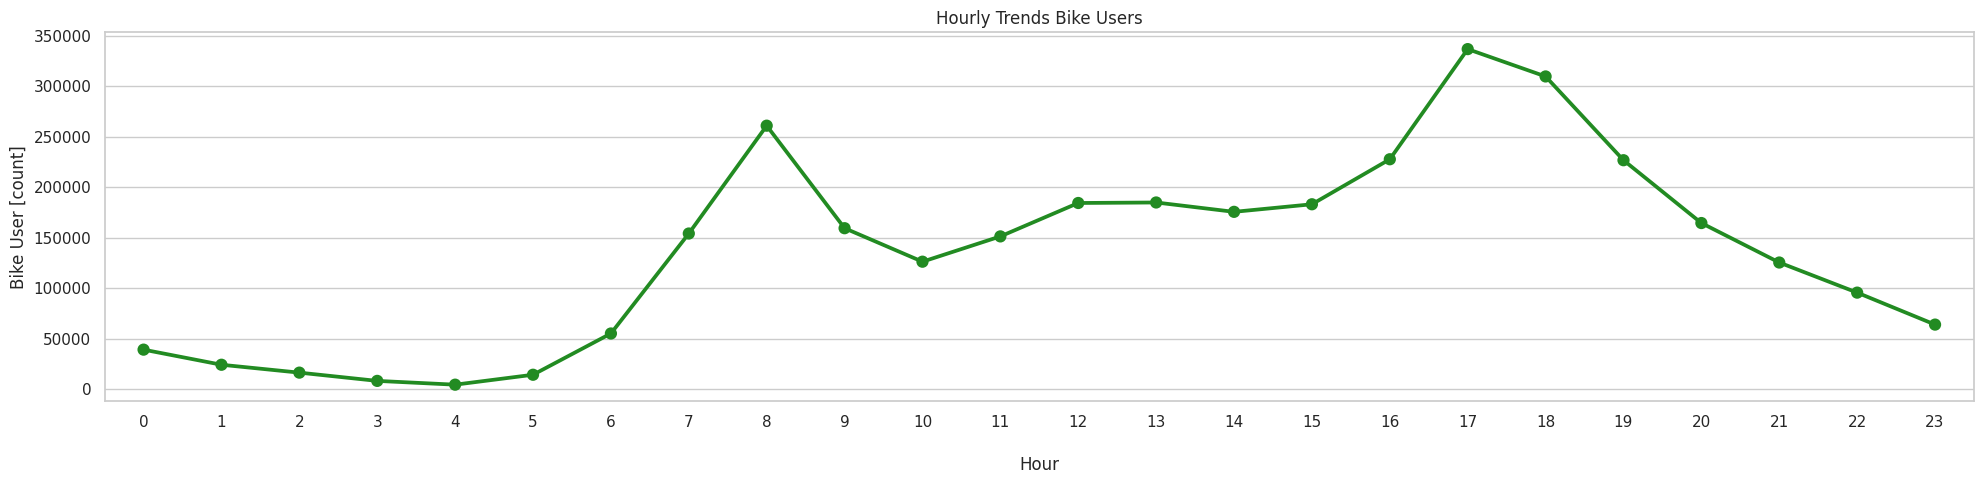

In [36]:
# visualize
fig, ax = plt.subplots(figsize=(20,5))
sns.pointplot(data=hourly_users, x='hour', y='count', ax=ax, color='forestgreen')
ax.set(title='Hourly Trends Bike Users')
plt.xlabel('\nHour')
plt.ylabel('Bike User [count]')
plt.tight_layout()
plt.show();

Most of the users bike during afternoon between 05.00 to 06.00 PM

### Monthly Bike Users: Casual Users vs. Registered Users

In [37]:
# table
monthly_users_cr = df.resample(rule='M', on='date').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})
monthly_users_cr.index = monthly_users_cr.index.strftime('%b-%y')
monthly_users_cr = monthly_users_cr.reset_index()
monthly_users_cr.sort_values(by='count', ascending=False)

,date,casual,registered,count
20,Sep-12,43778,174795,218573
19,Aug-12,43197,171306,214503
18,Jul-12,41705,161902,203607
17,Jun-12,43294,159536,202830
21,Oct-12,34538,164303,198841
16,May-12,44235,151630,195865
15,Apr-12,38456,135768,174224
14,Mar-12,31618,133257,164875
22,Nov-12,21009,131655,152664
5,Jun-11,30612,112900,143512


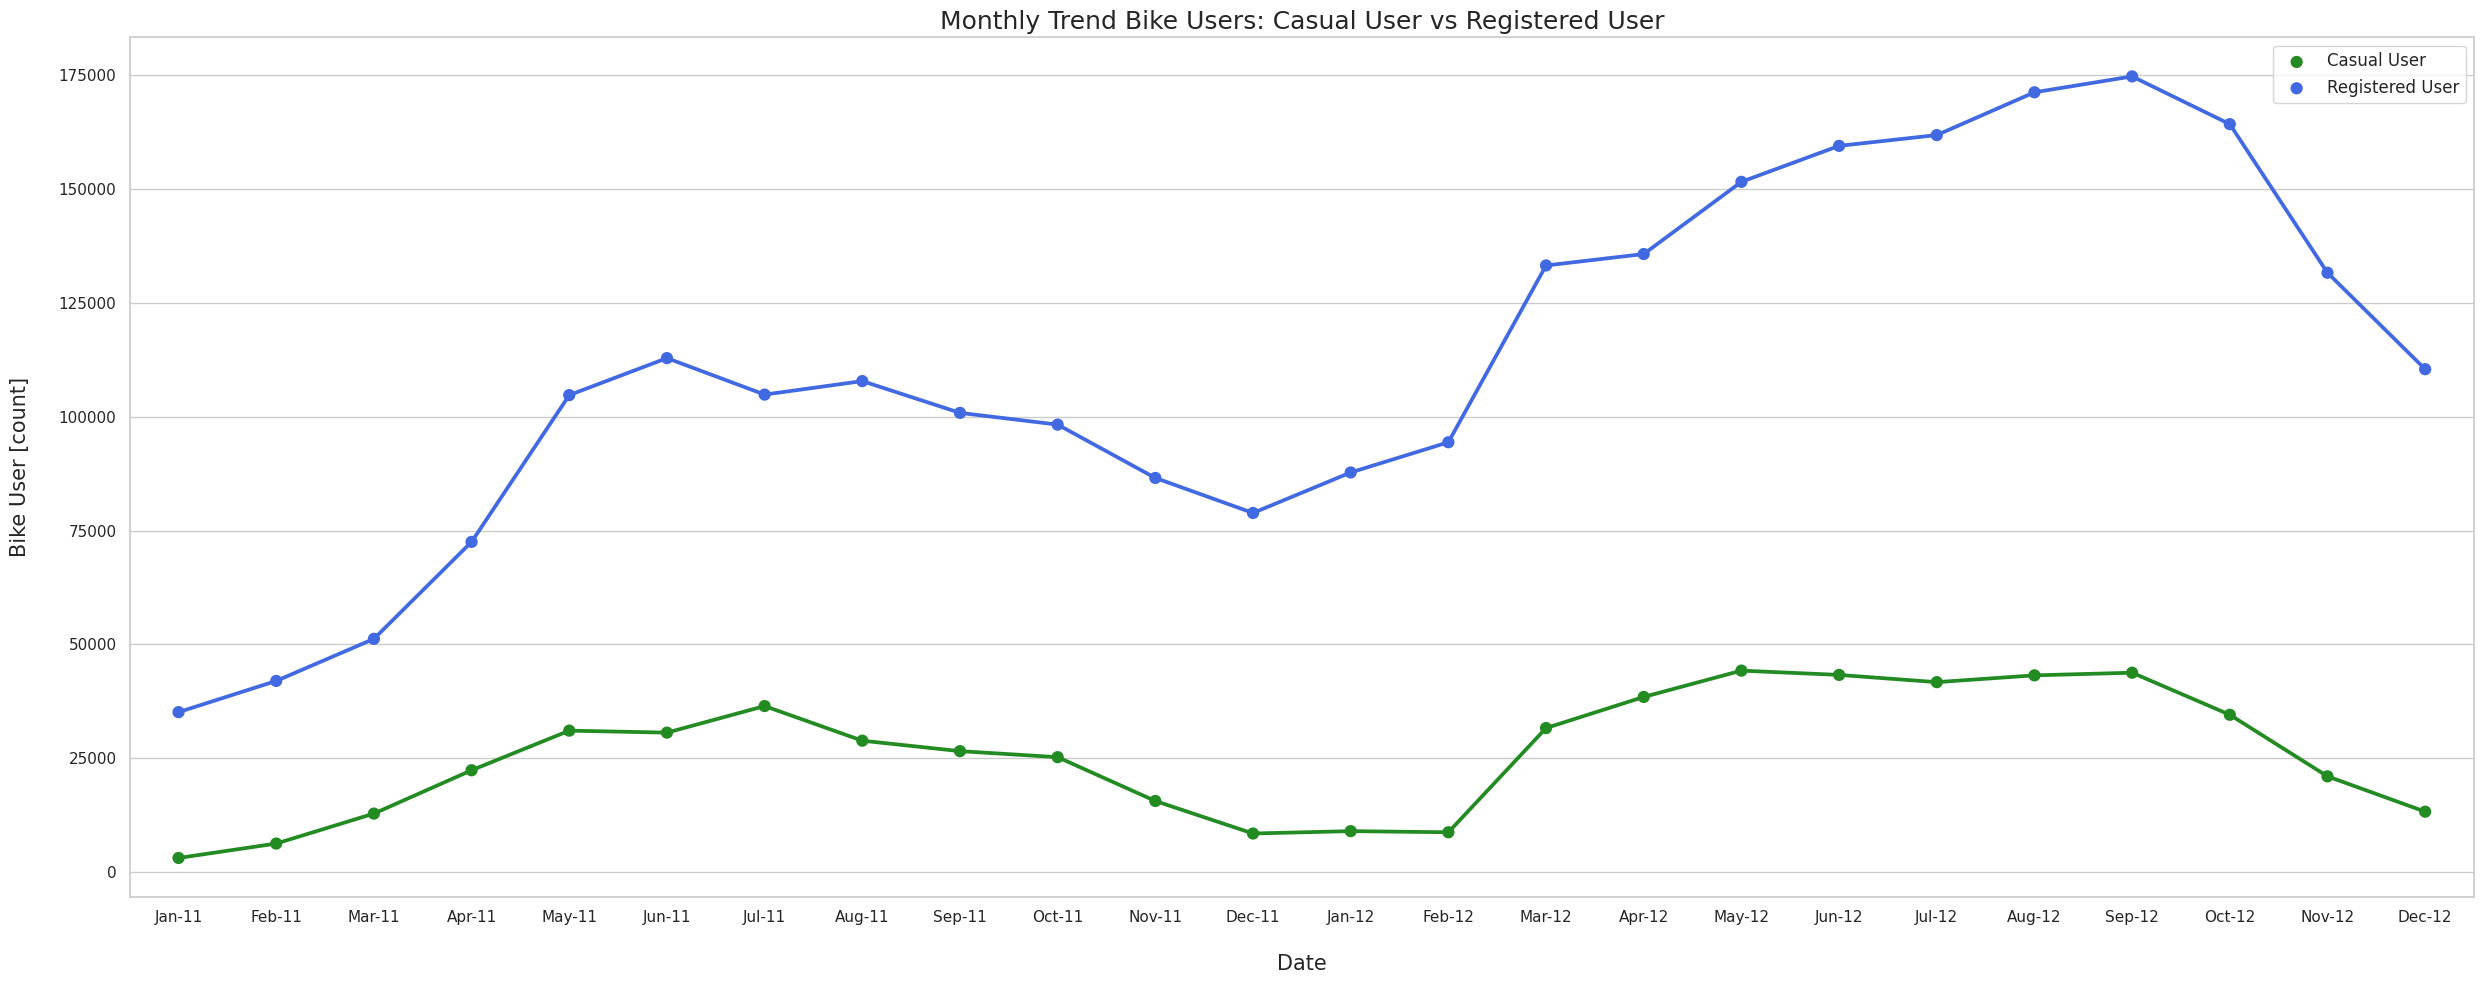

In [38]:
# visualize
fig, ax = plt.subplots(figsize=(25,10))
sns.pointplot(x='date', y='casual', data=monthly_users_cr, color='forestgreen', label='Casual User')
sns.pointplot(x='date', y='registered', data=monthly_users_cr, color='royalblue', label='Registered User')
plt.xlabel('\nDate', fontsize=15)
plt.ylabel('Bike User [count]\n', fontsize=15)
plt.title('Monthly Trend Bike Users: Casual User vs Registered User', fontsize=18)
plt.tight_layout()
ax.legend(fontsize=12)
plt.show();

September 2012 was the month with the highest number of registered users bikes. Meanwhile, May 2012 saw the highest traffic for casual bikers.

### Hourly Bike Users: Casual Users vs. Registered Users

In [39]:
# table
hourly_users_cr = df.groupby('hour').agg({
    'casual': 'sum',
    'registered': 'sum',
    'count': 'sum'
})
hourly_users_cr = hourly_users_cr.reset_index()
hourly_users_cr.sort_values(by='count', ascending=False)

,hour,casual,registered,count
17,17,54220,282640,336860
18,18,44496,265276,309772
8,8,15761,245240,261001
16,16,53834,173914,227748
19,19,35505,191284,226789
13,13,52713,132206,184919
12,12,49718,134696,184414
15,15,54606,128543,183149
14,14,55089,120563,175652
20,20,26378,138172,164550


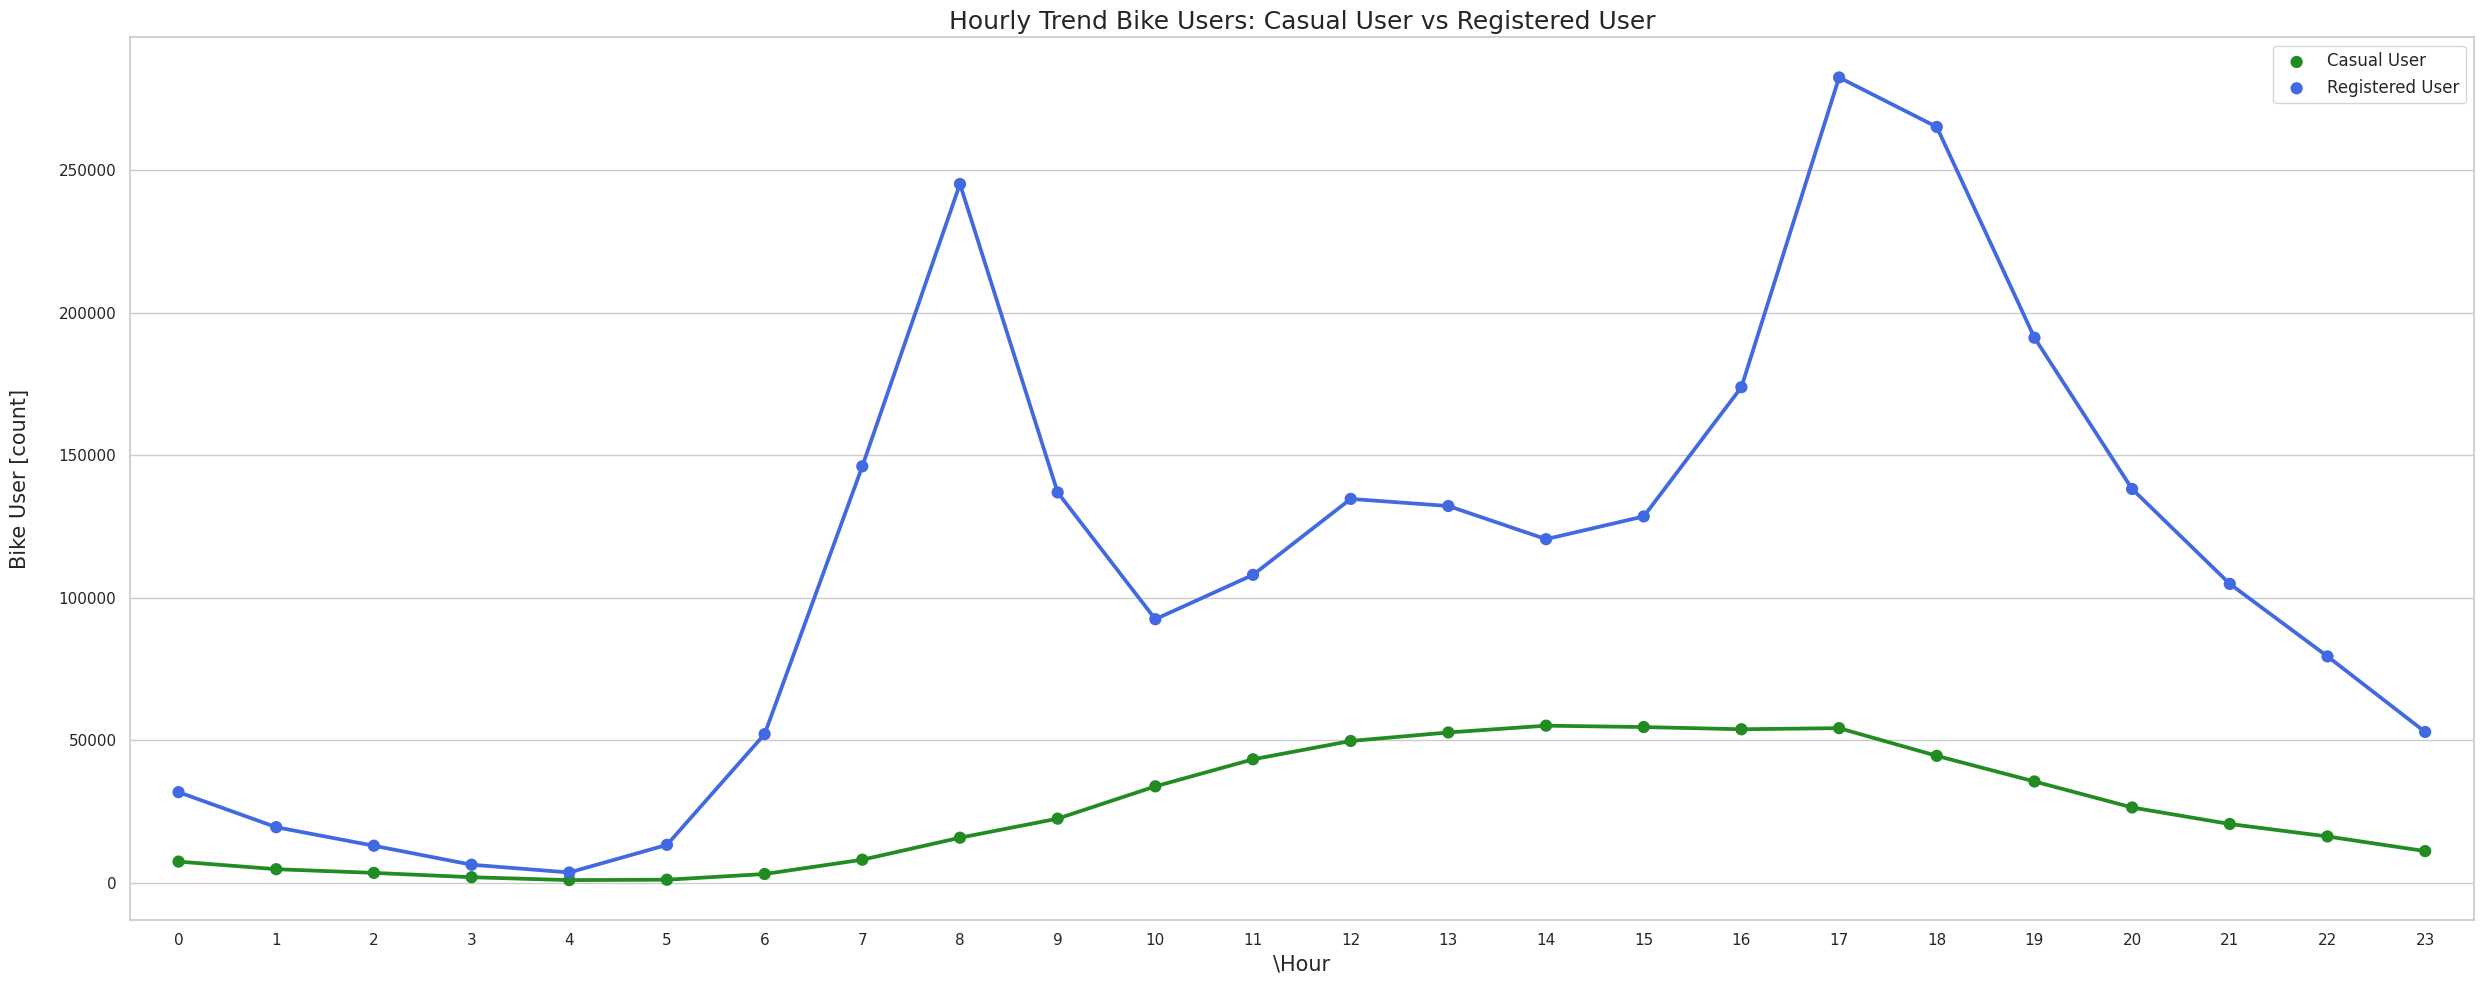

In [40]:
# visualize
fig, ax = plt.subplots(figsize=(25,10))
sns.pointplot(x='hour', y='casual', data=hourly_users_cr, color='forestgreen', label='Casual User')
sns.pointplot(x='hour', y='registered', data=hourly_users_cr, color='royalblue', label='Registered User')
plt.xlabel('\Hour', fontsize=15)
plt.ylabel('Bike User [count]\n', fontsize=15)
plt.title('Hourly Trend Bike Users: Casual User vs Registered User', fontsize=18)
plt.tight_layout()
ax.legend(fontsize=12)
plt.show();

In the afternoon, the majority of users either they're from registered/member or casual bikers.

### Correlation Bike Users with Temperature and Humidity

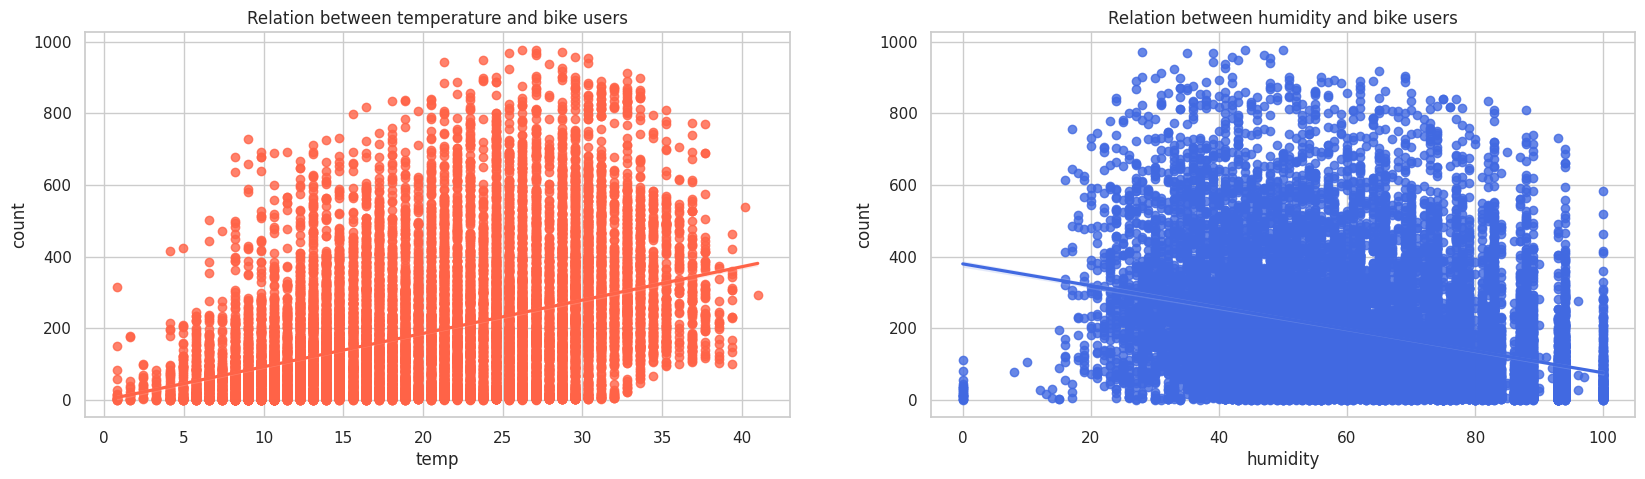

In [41]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(20,5))
sns.regplot(x=df['temp'], y=df['count'], ax=ax1, color='tomato')
ax1.set(title='Relation between temperature and bike users')
sns.regplot(x=df['humidity'], y=df['count'], ax=ax2, color='royalblue')
ax2.set(title='Relation between humidity and bike users');

As temperature increases, the plot indicates a weak yet positive relationship between the number of bike users increasing. And there is a weak negative correlation between the number of bike users and the decrease in humidity. Then we can assume, as the temperature rises and humidity drops, people are more inclined to ride bikes.

## Conclusion

* In 2012, the number of bike users was greater than in 2011. Both years had similar trends, with the number of bikes rising in the middle and falling in the beginning and end of the year.
* The number of bike usage increases during the day and decreases during the night is a common trend for both registered and casual users. Additionally, both had the most bike usage in September 2012.
* The summer season and clear weather were the most popular times for bike users. Conversely, the winter season and heavy rain weather are the lowest for bike usage.
* There is a weak correlation between higher temperatures and the increasing number of bike users, and also the number of bike users increasing is weakly correlated with lower humidity.